<a href="https://colab.research.google.com/github/MustaphaMaher/LinearRegression/blob/main/Notebook_RegressionLineraire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=black>Entrainer, régler et valider un algorithme de regression avec la bonne méthodologie </font>

Pour ce Notebook, nous allons utiliser le célèbre jeu de données `BOSTON`. Pour plus d'information veuillez consulter le lien suivant : https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

# <font color=blue>Entrainement et evaluation d'un modèle de regression </font>

Pour commencer on doit  charger les bibliothèques necessaires:
* `numpy` : (numerical python)
* `sklearn`: Sckit-learn
Sklearn vient avec un ensemble de bases de données prêtes à l’emploi pour des raisons académiques(apprendre le machine learning). 
Ces bases de données sont regroupées dans le package  sklearn.datasets.

In [28]:
#Chargement des bibliothèques
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


In [3]:
boston=datasets.load_boston()
x=boston.data
y=boston.target



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [9]:
print(x)



[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [10]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [4]:
# vérifier les types de X et y
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# avoir une idée sur les dimensions de X et y
print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [7]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
# afficher les noms des variables (“feature” en anglais) 
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Régression linéaire simple en fonction de RM

In [19]:
# Dans un premier temps on va essayer d'estimer le prix d'une maison en utilisant une seule variable soit 'RM'
from sklearn.model_selection import train_test_split
x1=x[:,5:6]
print(x1)
print(type(x1))

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

Maintenant il est temps d’entrainer un modèle machine learning. Pour faire simple, nous allons commencer avec l'un des modèles de regression le plus simple, ici en occurence le LinearRegression. 

In [20]:
# chargement du modèle LinearRegression 
from sklearn.linear_model import LinearRegression

### Créer une instance  `linreg1 ` de la classe  `LinearRegression `

In [21]:
Linreg1=LinearRegression()

### Entrainer  `linreg1 ` avec les sous-ensembles d'apprentissage puis caluler le test_score de  `linreg1 `

In [27]:
# Entrainer le modèle avec la méthode fit
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,train_size=0.2,random_state=3)
Linreg1.fit(x1_train,y_train)
print(Linreg1.score(x1_test,y_test))

0.4816745218822249
0.46896510604875175


### Aficcher l'intercept de `linreg1 `

In [29]:
#afficher le coefficient  B0
b0=Linreg1.intercept_


### Afficher les coefficients de `linreg1 `

In [30]:
#afficher le coefficient B1
b1=Linreg1.coef_

### Tracer les courbes 

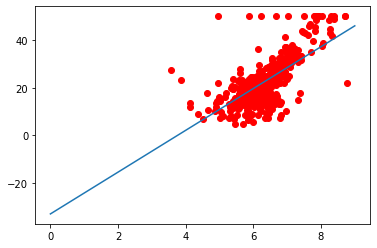

In [34]:
tp=np.linspace(0,9,100)
plt.plot(x1,y,'ro')
plt.plot(tp,b0+tp*b1)

### Predire la valeur à calculer en fonction d'une valeur explicative

In [45]:
x1new=np.array([[5]])
Linreg1.predict(x1new)

array([20.90220043])

#Regression Lineaire simple en fonction de CRIM

In [39]:
Linreg2=LinearRegression()
x2=x[:,1:2]
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,train_size=0.2,random_state=3)
Linreg2.fit(x2_train,y_train)
print(Linreg2.score(x2_test,y_test))


0.09548720541661693


In [40]:
a0=Linreg2.intercept_
a1=Linreg2.coef_

# Régression linéaire multiple

In [47]:
x=boston.data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=3)
Linregm=LinearRegression()
Linregm.fit(x_train,y_train)
print(Linregm.score(x_test,y_test))

0.7063759044921272


### Régression linéaire multiple (toutes les variables de Boston)   avec les valeurs par defauts de `LinearRegression`

In [50]:
a0=Linregm.intercept_
print(a0)
print(Linregm.coef_)



23.387628371299854
[-1.54982785e-01  6.26648259e-02 -8.52811468e-02  4.07820865e+00
 -1.53791085e+01  4.67095231e+00 -5.44364622e-03 -1.06991914e+00
  1.98427388e-01 -5.05189938e-03 -8.29171108e-01  7.76007437e-03
 -2.98592891e-01]


### Régression linéaire multiple (toutes les variables de Boston)  avec `fit_intercept= False` et `normalize=True`

In [51]:
Linregm2=LinearRegression(fit_intercept=False,normalize=True)

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=3)
Linregm2.fit(x_train,y_train)
print(Linregm2.score(x_test,y_test))
print(Linregm2.intercept_)
print(Linregm2.coef_)

0.6777441347504023
0.0
[-1.61608615e-01  6.22572787e-02 -1.01991767e-01  4.98610555e+00
 -6.60144958e+00  6.12966281e+00  2.43714338e-03 -7.03423343e-01
  1.28283279e-01 -3.92129838e-03 -5.25934540e-01  1.07173047e-02
 -2.18788559e-01]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [63]:
list(zip(boston.feature_names,Linregm2.coef_))

[('CRIM', -0.16160861539204216),
 ('ZN', 0.062257278654465065),
 ('INDUS', -0.10199176667080107),
 ('CHAS', 4.986105545679265),
 ('NOX', -6.6014495802273),
 ('RM', 6.129662810387116),
 ('AGE', 0.002437143382688486),
 ('DIS', -0.7034233431661888),
 ('RAD', 0.12828327898364264),
 ('TAX', -0.0039212983762170195),
 ('PTRATIO', -0.5259345399173198),
 ('B', 0.010717304709425522),
 ('LSTAT', -0.21878855895233942)]

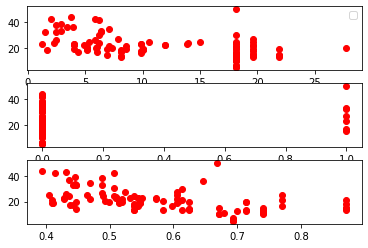

In [71]:
#plt.plot(x_train[:,1,2],y_train)
plt.subplot(3,1,1)
plt.plot(x_train[:,2:3],y_train,'ro')
plt.legend()
plt.subplot(3,1,2)
plt.plot(x_train[:,3:4],y_train,'ro')
plt.subplot(3,1,3)
plt.plot(x_train[:,4:5],y_train,'ro')
#x_train[:,1:2]